In [ ]:
using Plots

In [22]:
function add_combined_hlines!(offsets::Vector{Float64}, base_values::Vector{Float64}; 
                              label::String="", linestyle=:dash, lw=1, color=:gray, alpha=0.3)
    # Combine all horizontal line y-values based on base values and offsets
    combined_hlines = vcat([base_values .+ offset for offset in offsets]...)  # Combine adjusted base values
    # Plot all combined horizontal lines
    hline!(combined_hlines, label=label, linestyle=linestyle, lw=lw, color=color, alpha=alpha)
end

add_combined_hlines! (generic function with 6 methods)

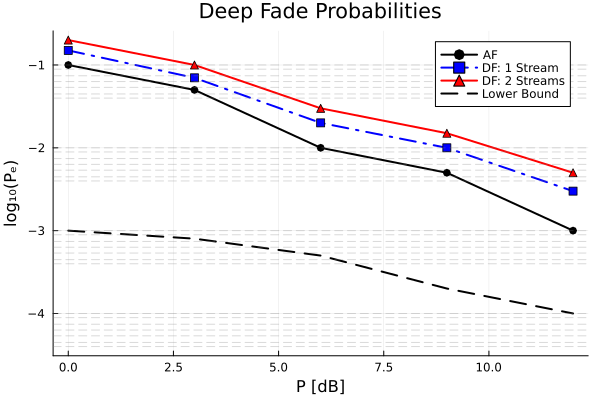

In [18]:
# Example Data
SNR_dB = 0:3:12  # SNR range in dB
Pe_AF = [0.1, 0.05, 0.01, 0.005, 0.001]  # AF probabilities
Pe_DF_1 = [0.15, 0.07, 0.02, 0.01, 0.003]  # DF 1-stream probabilities
Pe_DF_2 = [0.2, 0.1, 0.03, 0.015, 0.005]  # DF 2-stream probabilities
lower_bound = [0.001, 0.0008, 0.0005, 0.0002, 0.0001]  # Lower bound

# Convert to log10 scale
log_Pe_AF = log10.(Pe_AF)
log_Pe_DF_1 = log10.(Pe_DF_1)
log_Pe_DF_2 = log10.(Pe_DF_2)
log_lower_bound = log10.(lower_bound)

# Main Plot
plot(SNR_dB, log_Pe_AF, label="AF", marker=:o, lw=2, color=:black
    , xlabel = "P [dB]"), ylabel!("log₁₀(Pₑ)"
    , title = "Deep Fade Probabilities"
    , grid = true
)
plot!(SNR_dB, log_Pe_DF_1, label="DF: 1 Stream", marker=:square, linestyle=:dashdot, lw=2, color=:blue)
plot!(SNR_dB, log_Pe_DF_2, label="DF: 2 Streams", marker=:utriangle, linestyle=:solid, lw=2, color=:red)
plot!(SNR_dB, log_lower_bound, label="Lower Bound", linestyle=:dash, lw=2, color=:black)

# Combine all horizontal line y-values into a single array
combined_hlines = vcat(
    [-1.00, -2.00, -3.00, -4.00],
    [-1.05, -2.05, -3.05, -4.05],
    [-1.13, -2.13, -3.13, -4.13],
    [-1.20, -2.20, -3.20, -4.20],
    [-1.27, -2.27, -3.27, -4.27],
    [-1.35, -2.35, -3.35, -4.35],
    [-1.40, -2.40, -3.40, -4.40]
)

# Add all dashed lines with one hline! call
hline!(combined_hlines, label="", linestyle=:dash, lw=1, color=:gray, alpha=0.3)

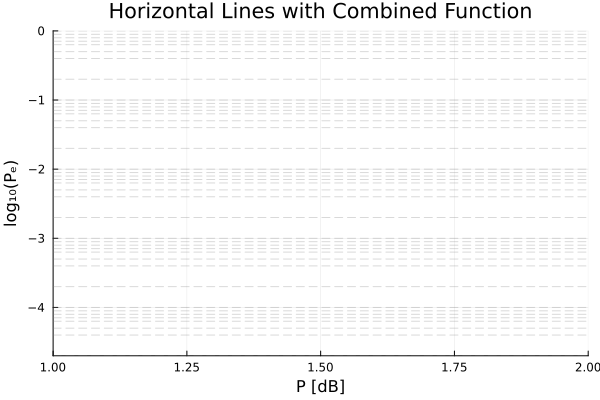

In [29]:
# Define base values and offsets
base_values = [-0.00, -1.00, -2.00, -3.00, -4.00]
offsets = [0.0, -0.05, -0.10, -0.15, -0.20, -0.30, -0.40, -0.70]

# Plot with function
plot(
    xlabel="P [dB]", ylabel="log₁₀(Pₑ)"
    , title = "Horizontal Lines with Combined Function"
    , grid = true
)  # Initialize a plot
add_combined_hlines!(offsets, base_values, linestyle=:dash, lw=1, color=:gray, alpha=0.3)

# Add Labels and Title
